# Credit Card Churn Data Analytics Project

### Important Libraries Import

This import all the necessary libraries

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Install and enable Jupyter, ipywidgets, and ydata-profiling in the notebook environment
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel
!{sys.executable} -m pip install notebook jupyterlab ipywidgets ydata-profiling
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension --sys-prefix
# After running this cell, restart the kernel and rerun your profiling cell if needed.

usage: jupyter.py [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
                  [--paths] [--json] [--debug]
                  [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


### Credit Card Dataset Import

This import the Credit Card Customer dataset

In [4]:
# Import the credit card analytics dataset 
df = pd.read_csv('bank-churners.csv')


### Initial Data Exploration

This is an initial data exploration

In [5]:
# Initial data exploration
print("Dataset Shape:", df.shape)
print("\nFirst five rows of the dataset: \n\n", df.head())
print("\nDataset Information:")
df.info()
print("\nStatistical Summary of the dataset:")
df.describe()  

Dataset Shape: (10127, 23)

First five rows of the dataset: 

    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ... 

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
# Further data exploration
# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")
    print(df[col].value_counts().head(9))
    


Unique values in 'Attrition_Flag': 2
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Unique values in 'Gender': 2
Gender
F    5358
M    4769
Name: count, dtype: int64

Unique values in 'Education_Level': 7
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Unique values in 'Marital_Status': 4
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Unique values in 'Income_Category': 6
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Unique values in 'Card_Category': 4
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


### Checks for Missing Values
This checks for missing values in the dataset

In [7]:
# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())



Missing Values in Each Column:

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category

### Y Data Profiling
This uses a Y Data Profiler to profile the credit card customer dataset

In [ ]:
# Ensure compatible template handling to fix:
# TemplateNotFound: wrapper/assets/bootstrap.min.css
# Install/upgrade ydata-profiling and use a Jinja2 version known to work with the profiler templates.
# %pip install --upgrade ydata-profiling
# try upgrading the profiler library and jinja2
# %pip install -U ydata-profiling jinja2
# %pip uninstall ydata-profiling pandas-profiling -y
# %pip install ydata-profiling

# Generate a comprehensive profiling report using ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Credit Card Analytics Dataset Profile Report")
profile.to_file("credit_card_churn_analytics_profile_report.html")
# profile.to_widgets()
# profile.to_notebook_iframe()
# Note: The above line generates an HTML report file in the current directory.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 23/23 [00:00<00:00, 37.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Charts Comparing Attrition Rate by Demographic Category
This plots a number of charts to compare attrition rate by a number of demographic categories

### Bar charts comparing attrition rate by demographic category
This plots bar charts comparing attrition rate by demographic categories

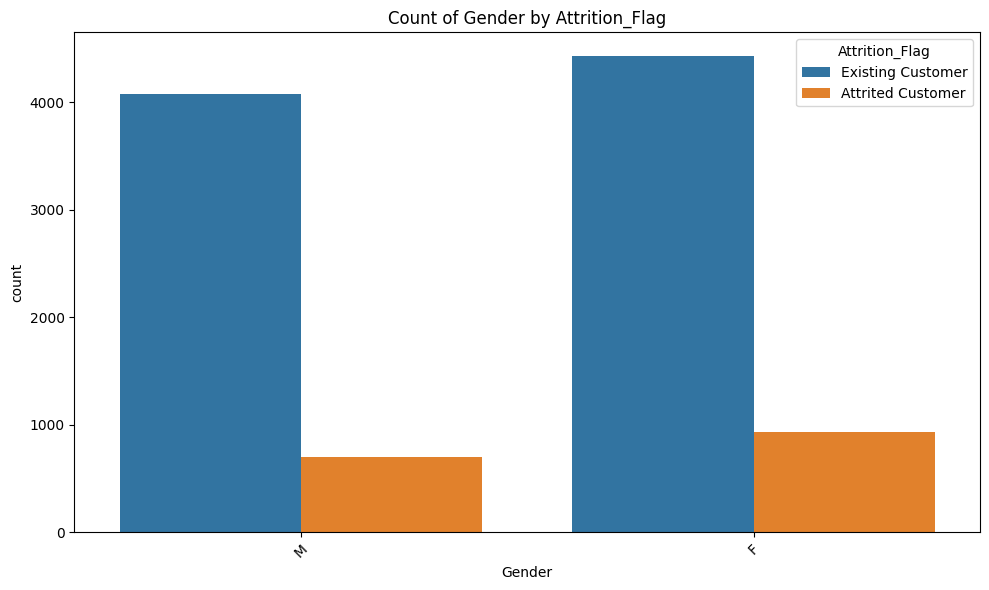

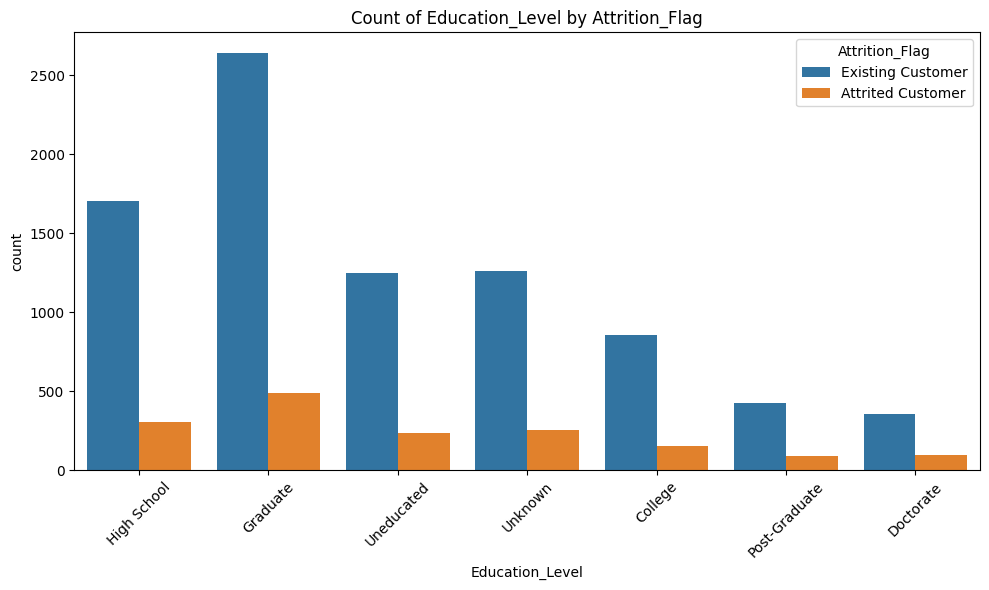

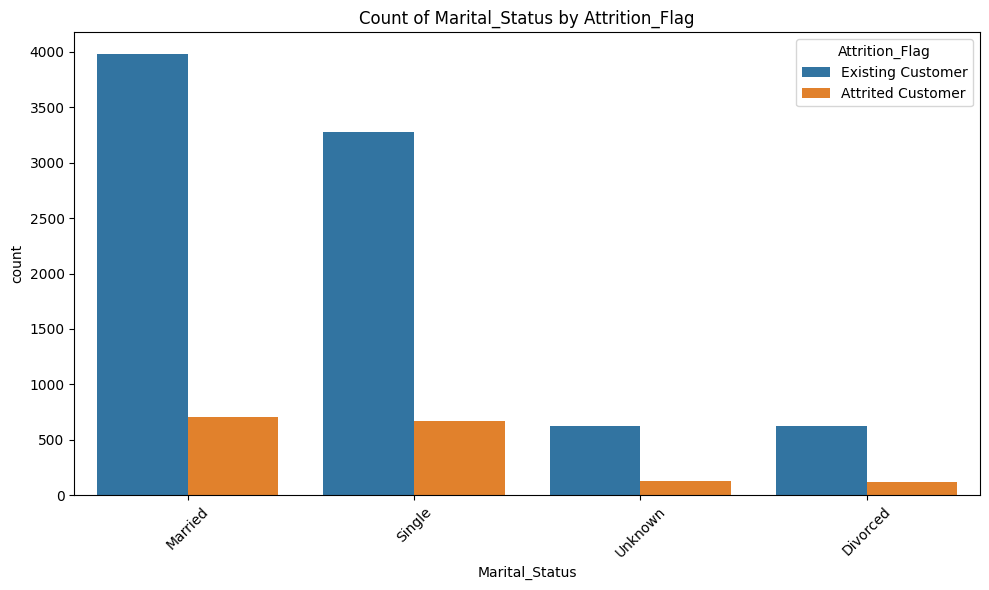

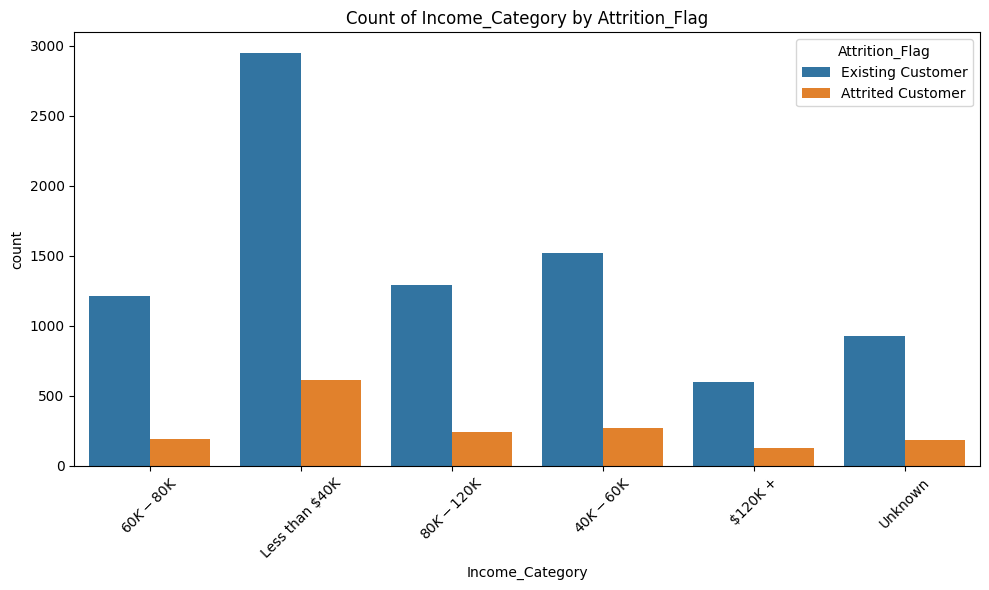

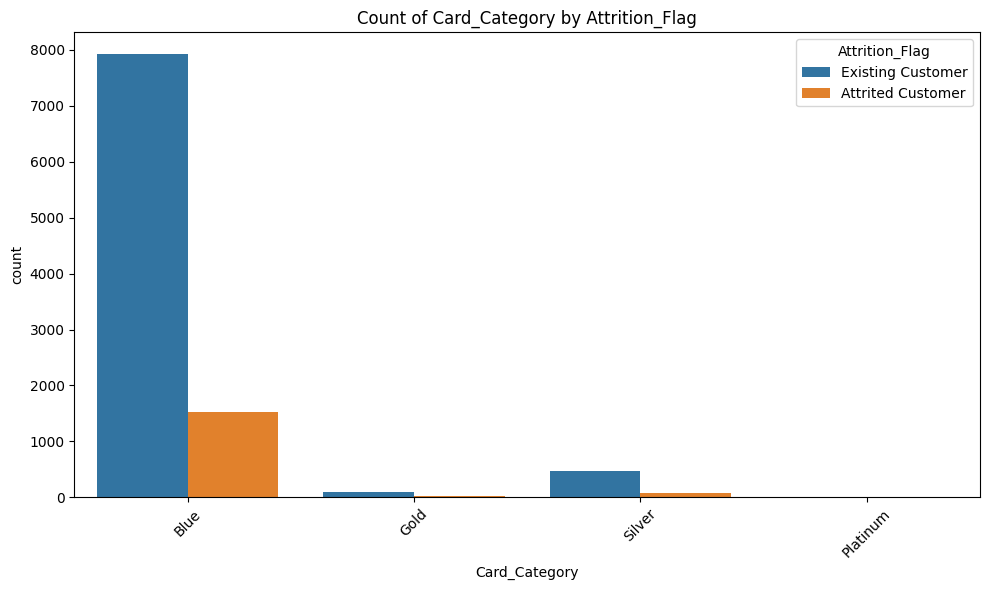

In [8]:
# Bar charts comparing categorical variables with the target variable 'Attrition_Flag'
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for var in categorical_vars:    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=var, hue='Attrition_Flag')
    plt.title(f'Count of {var} by Attrition_Flag')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition_Flag', loc='upper right')
    plt.tight_layout()
    plt.show()

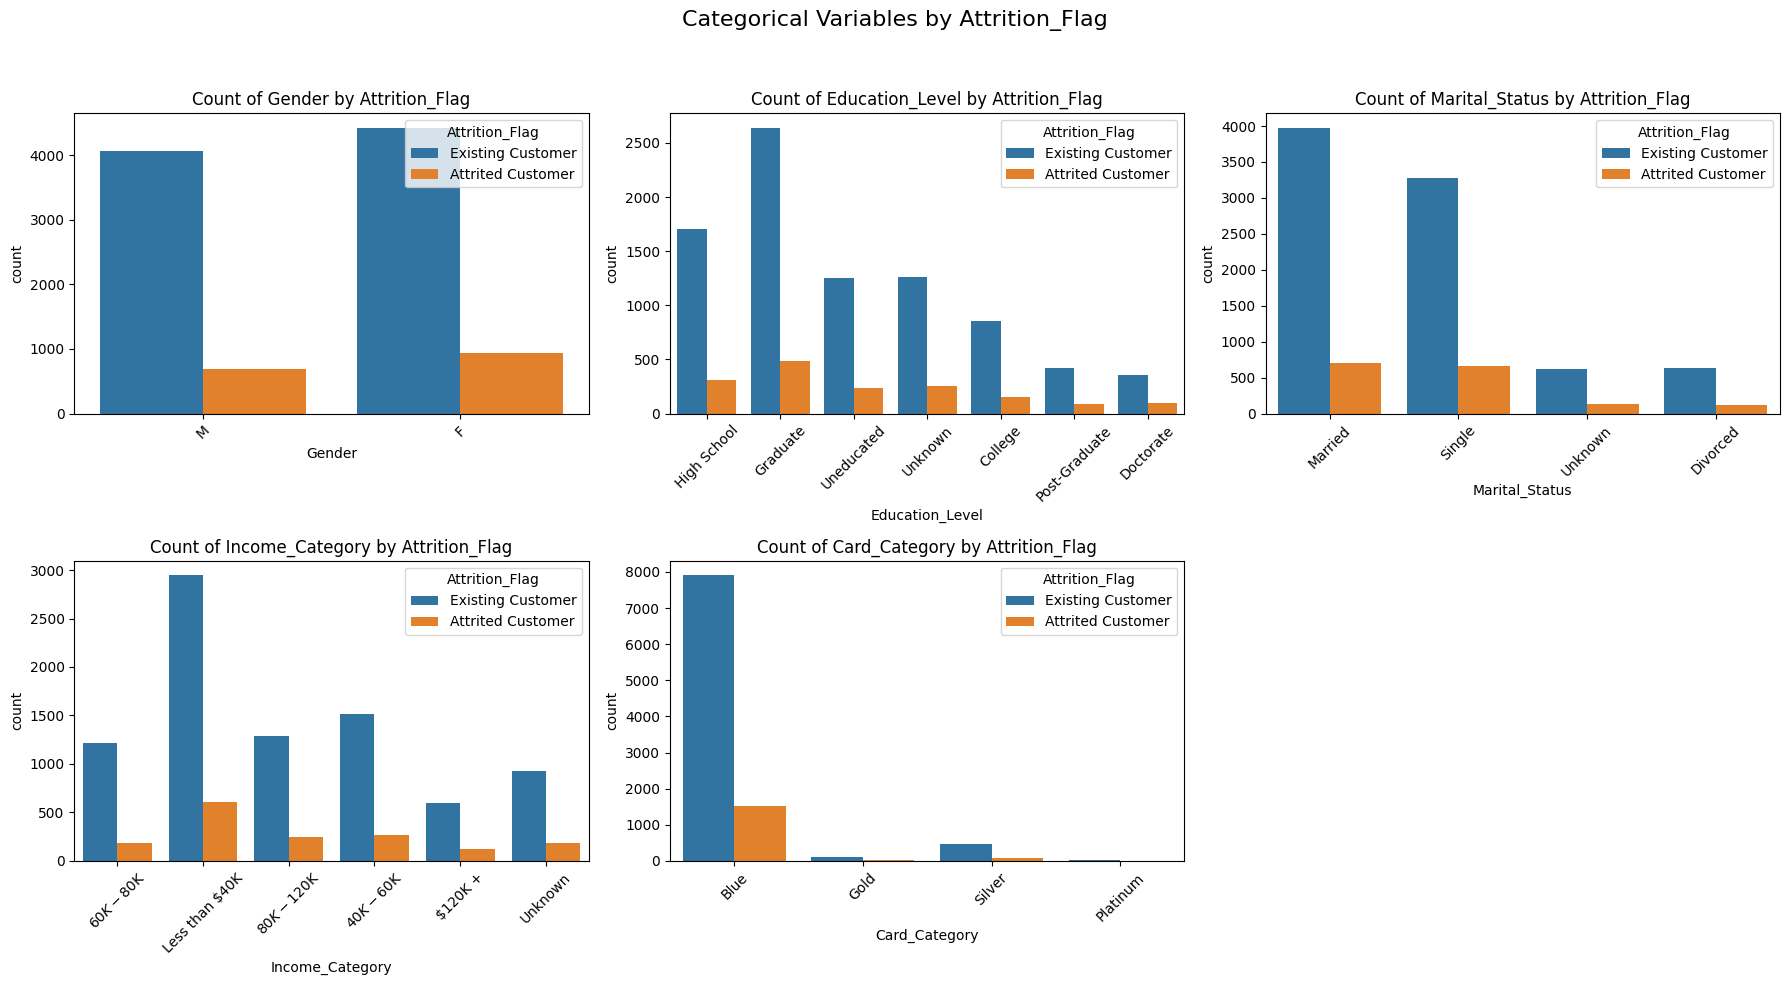

In [9]:
# Bar charts comparing categorical variables with the target variable 'Attrition_Flag'
# Modified to create multiple plots

categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# adjust spacing (do NOT assign the return value)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

fig.suptitle('Categorical Variables by Attrition_Flag', fontsize=16)
# flatten axes array for easy indexing
axs = axs.flatten()

for i, var in enumerate(categorical_vars):    
    sns.countplot(data=df, x=var, hue='Attrition_Flag', ax=axs[i])
    axs[i].set_title(f'Count of {var} by Attrition_Flag')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(title='Attrition_Flag', loc='upper right')

# turn off any unused axes (we created 6, but have 5 variables)
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# adjust layout to accommodate suptitle
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Histogram of age distribution by attrition rate

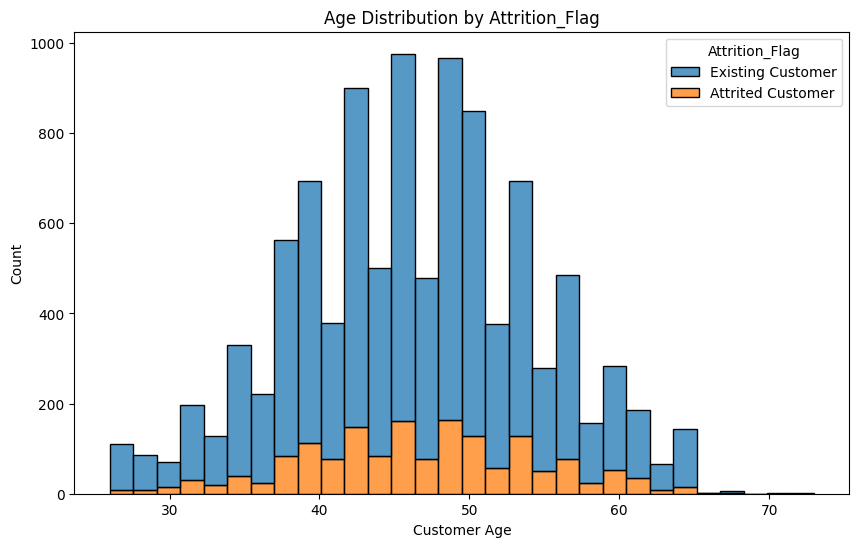

In [10]:
# Plots for age distribution by attrition flag
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Customer_Age', hue='Attrition_Flag', multiple='stack', bins=30)
plt.title('Age Distribution by Attrition_Flag') 
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

### Boxplots of age distribution by attrition rate

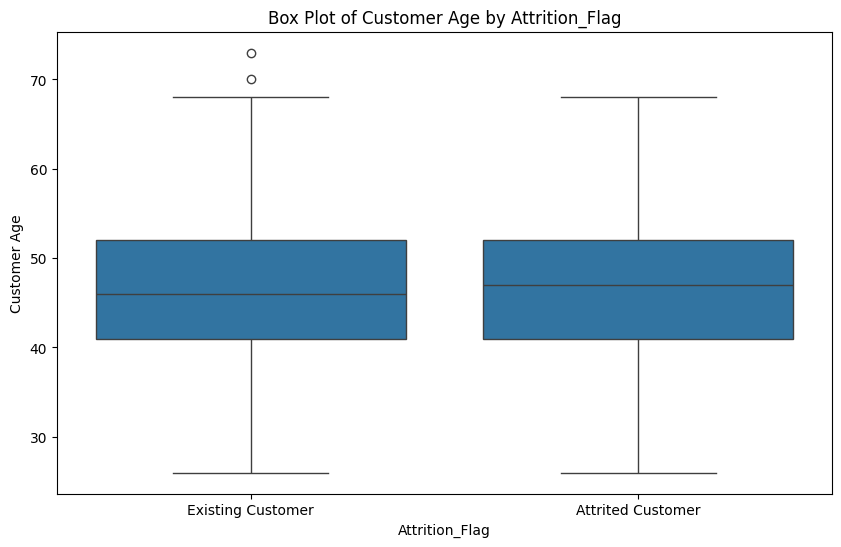

In [11]:
# Box plots for age distribution by attrition flag
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')
plt.title('Box Plot of Customer Age by Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Customer Age')
plt.show()

### Stacked bars for education vs. attrition rate

<Figure size 1000x600 with 0 Axes>

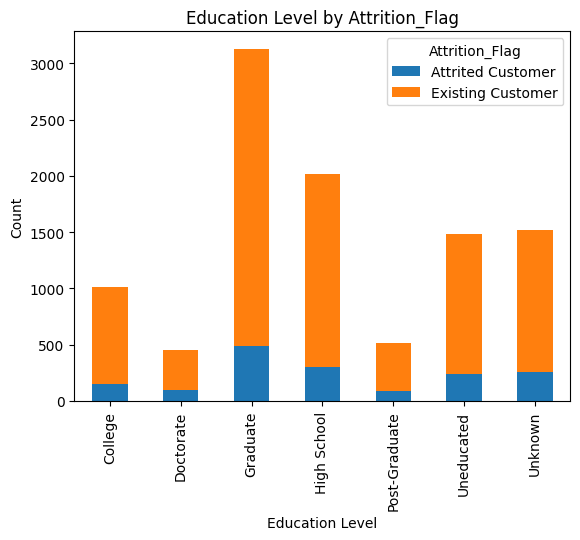

In [12]:
# Stacked bar chart for education level category by attrition flag
plt.figure(figsize=(10, 6))
education_attrition = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])
education_attrition.plot(kind='bar', stacked=True)
plt.title('Education Level by Attrition_Flag')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

### Correlation of number of dependents with attrition rate
Does the number of dependents correlate with attrition?

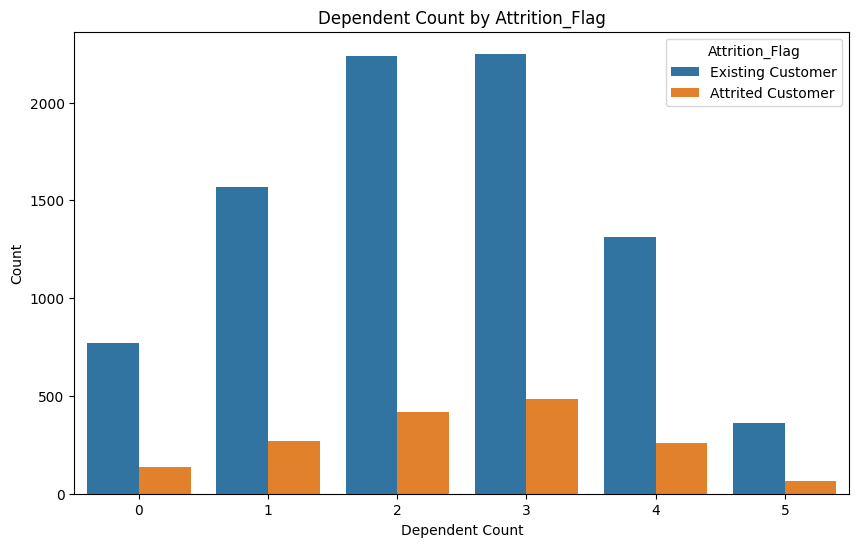

In [13]:
# How does dependent count correlate with attrition flag?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dependent_count', hue='Attrition_Flag')
plt.title('Dependent Count by Attrition_Flag')
plt.xlabel('Dependent Count')
plt.ylabel('Count') 
plt.show()  

### Attrition among customers with Months On Book
Is attrition higher among customers with fewer/more Months_on_book?

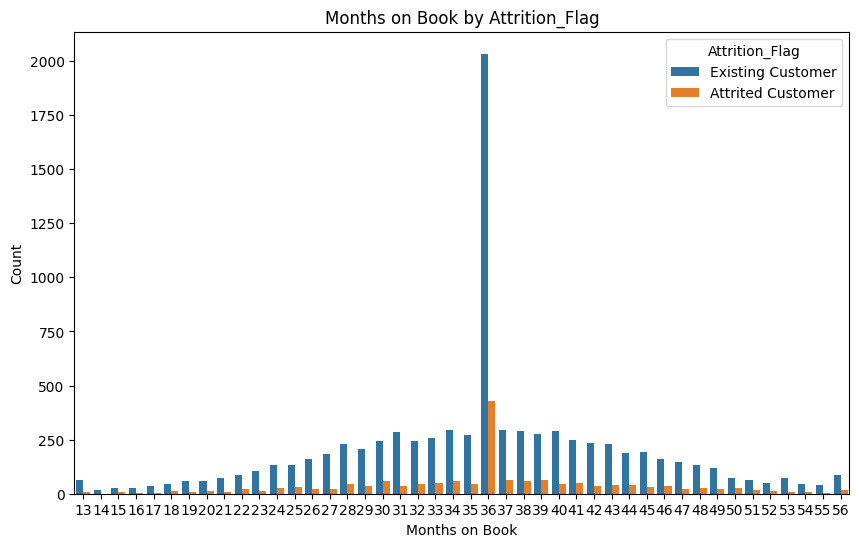

In [14]:
# How does customers with months on book relate to attrition flag?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Months_on_book', hue='Attrition_Flag')
plt.title('Months on Book by Attrition_Flag')
plt.xlabel('Months on Book')
plt.ylabel('Count')
plt.show()

### Cohort Analysis for Months on Book vs Attrition Rate
Cohort curve for Months_on_book vs. attrition rate

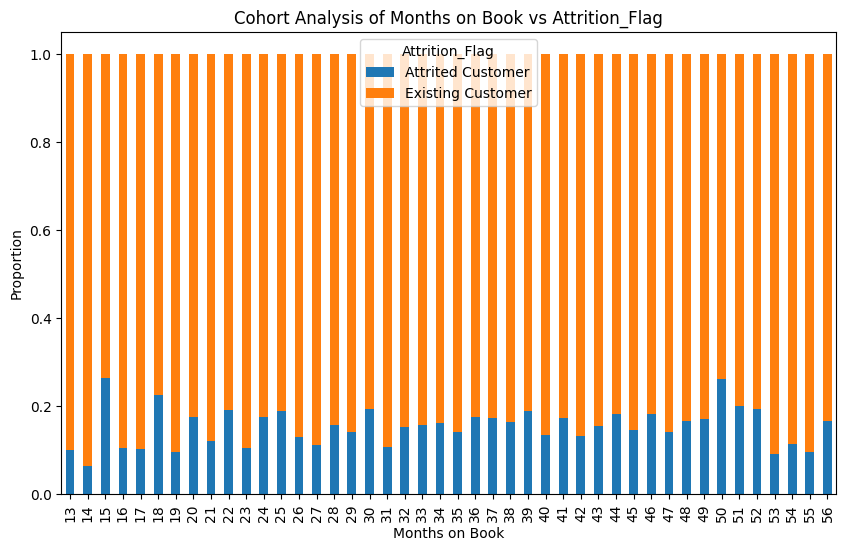

In [15]:
# cohort analysis of months on book vs attrition flag
months_attrition = pd.crosstab(df['Months_on_book'], df['Attrition_Flag'])
months_attrition_norm = months_attrition.div(months_attrition.sum(axis=1), axis=0)
months_attrition_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cohort Analysis of Months on Book vs Attrition_Flag')
plt.xlabel('Months on Book')
plt.ylabel('Proportion')
plt.show()

### Cohort Analysis

Cohort analysis groups customers into cohorts that share a common attribute or starting period (here we use `Months_on_book` as a proxy for customer age). We then track each cohort's retention (or attrition) over time. Below we create cohorts by grouping `Months_on_book` into 6‑month buckets, compute the proportion of existing customers for each cohort at each `Months_on_book`, and visualise the results as a heatmap.

This approach works when you don't have explicit signup dates but have a measure of customer age/tenure such as `Months_on_book`.

Months_on_book,13,14,15,16,17,18,19,20,21,22,...,47,48,49,50,51,52,53,54,55,56
cohort_group,,,,,,,,,,,,,,,,,,,,,
12,0.9,0.938,0.735,0.897,0.897,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,0.776,0.905,0.824,0.88,0.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.833,0.83,0.74,0.8,0.806,0.91,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887,0.905,0.835


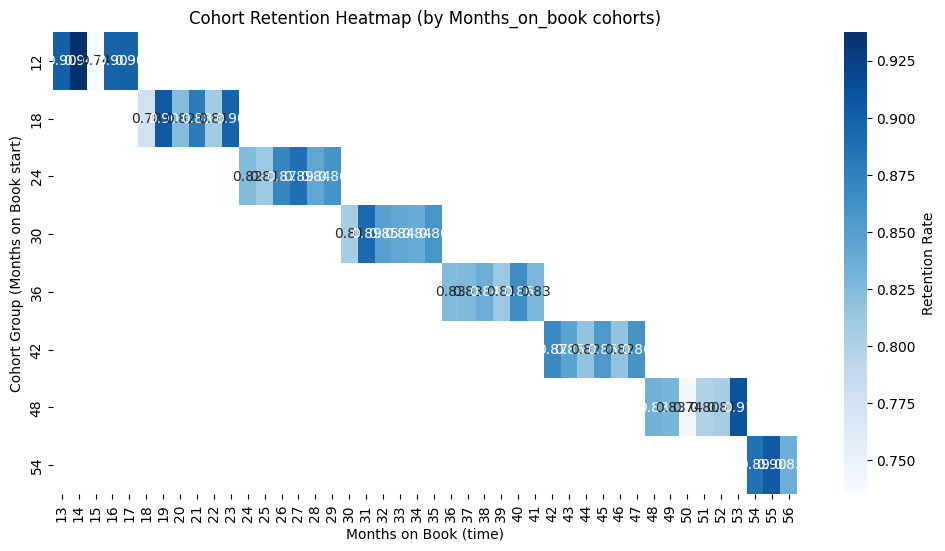

In [16]:
# Cohort retention table and heatmap using `Months_on_book` as cohort/time axis

# prepare a working copy
df_cohort = df.copy()

# create 6-month cohort buckets (0-5,6-11,...)
df_cohort['cohort_group'] = (df_cohort['Months_on_book'] // 6) * 6
# mark retained customers (adjust string to match your dataset values)
retained_label = 'Existing Customer'
df_cohort['is_retained'] = np.where(df_cohort['Attrition_Flag'] == retained_label, 1, 0)

# compute retention rate per cohort by Months_on_book
retention = (
    df_cohort
    .groupby(['cohort_group', 'Months_on_book'])['is_retained']
    .mean()
    .reset_index()
)

# pivot to table: rows = cohort_group, cols = Months_on_book
retention_pivot = retention.pivot(index='cohort_group', columns='Months_on_book', values='is_retained')

# sort columns for display
retention_pivot = retention_pivot.reindex(sorted(retention_pivot.columns), axis=1)

# display the retention table (rounded)
display(retention_pivot.round(3))

# plot heatmap (mask NaNs)
plt.figure(figsize=(12, 6))
sns.heatmap(retention_pivot, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Retention Rate'})
plt.title('Cohort Retention Heatmap (by Months_on_book cohorts)')
plt.xlabel('Months on Book (time)')
plt.ylabel('Cohort Group (Months on Book start)')
plt.show()
